In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import acquire
import prepare
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

In [2]:
# Cleaned Data for Exploration
df = acquire.get_telco_data(cached = True)
train, validate, test = prepare.prep_telco_data(df)

In [3]:
churn_rate = train.churn.mean()

Text(0.5, 0, 'Churn')

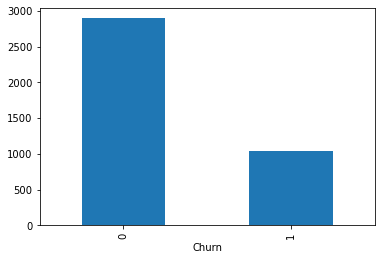

In [4]:
train.churn.value_counts().plot.bar()
plt.xlabel('Churn')

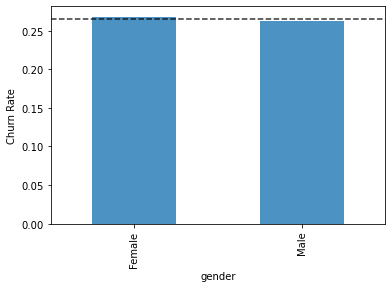

In [5]:
train.groupby('gender').churn.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)

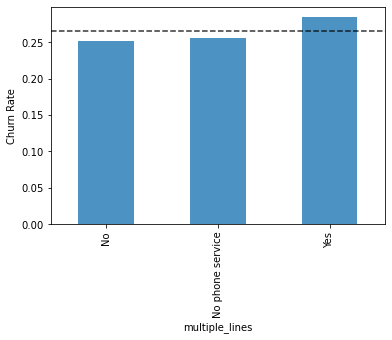

In [6]:
train.groupby('multiple_lines').churn.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)

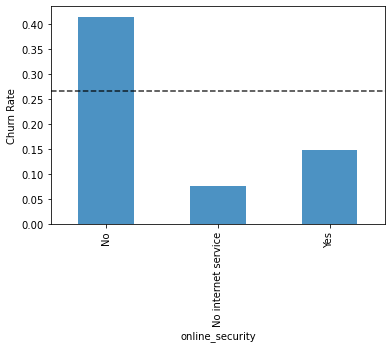

In [7]:
train.groupby('online_security').churn.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)

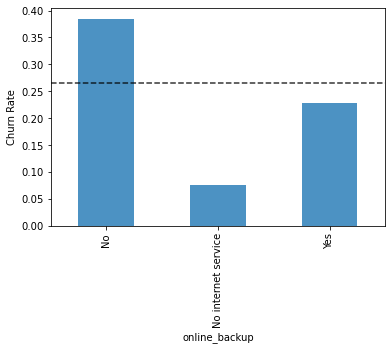

In [8]:
train.groupby('online_backup').churn.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)

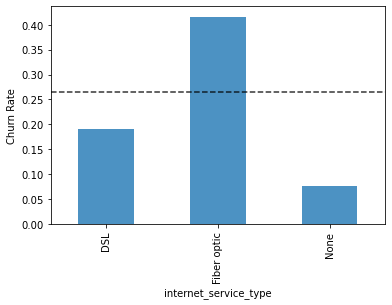

In [9]:
train.groupby('internet_service_type').churn.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)

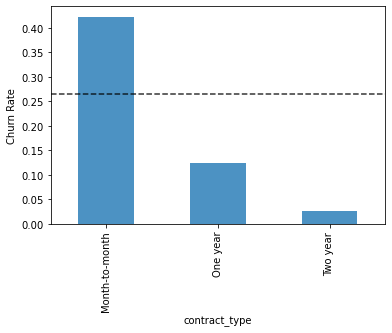

In [10]:
train.groupby('contract_type').churn.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)

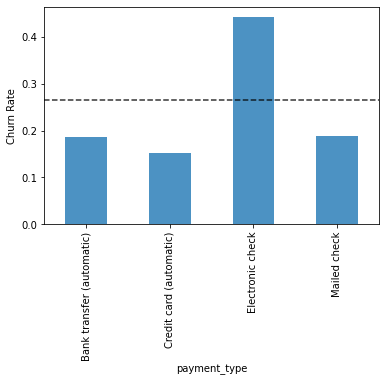

In [11]:
train.groupby('payment_type').churn.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5670 to 6867
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   3943 non-null   object 
 1   senior_citizen           3943 non-null   int64  
 2   partner                  3943 non-null   int64  
 3   dependents               3943 non-null   int64  
 4   tenure                   3943 non-null   int64  
 5   phone_service            3943 non-null   int64  
 6   multiple_lines           3943 non-null   object 
 7   online_security          3943 non-null   object 
 8   online_backup            3943 non-null   object 
 9   device_protection        3943 non-null   object 
 10  tech_support             3943 non-null   object 
 11  streaming_tv             3943 non-null   object 
 12  streaming_movies         3943 non-null   object 
 13  paperless_billing        3943 non-null   int64  
 14  monthly_charges      

In [13]:
pd.crosstab(train.churn, train.payment_type)

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
churn,,,,
0,700,706,741,750
1,160,126,587,173


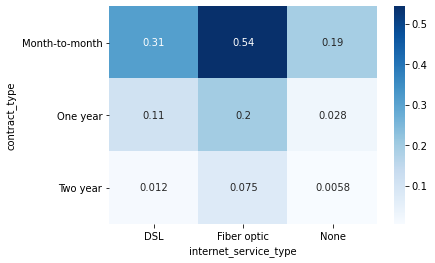

In [14]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'internet_service_type'), cmap='Blues', annot=True)

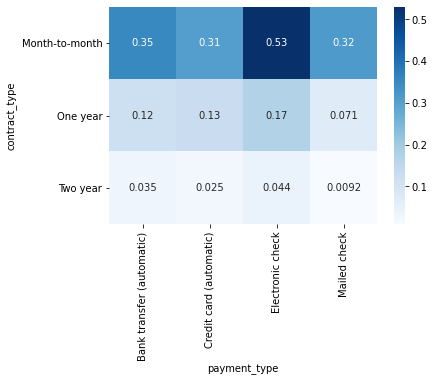

In [15]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'payment_type'), cmap='Blues', annot=True)

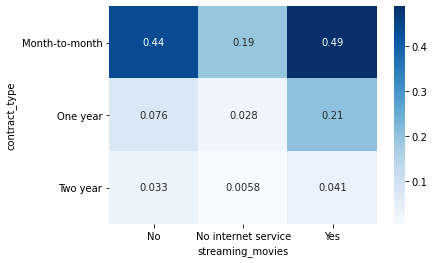

In [16]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'streaming_movies'), cmap='Blues', annot=True)

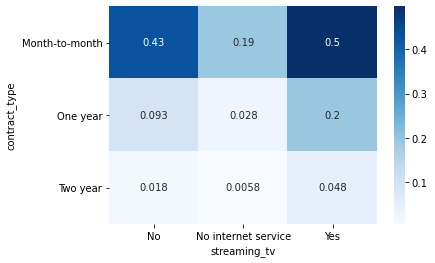

In [17]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'streaming_tv'), cmap='Blues', annot=True)

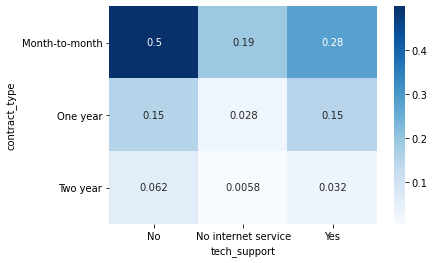

In [18]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'tech_support'), cmap='Blues', annot=True)

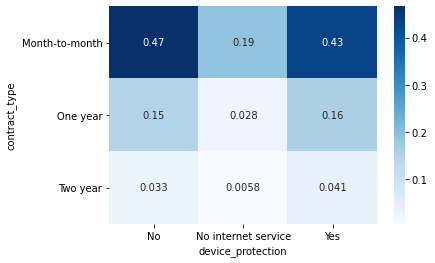

In [19]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'device_protection'), cmap='Blues', annot=True)

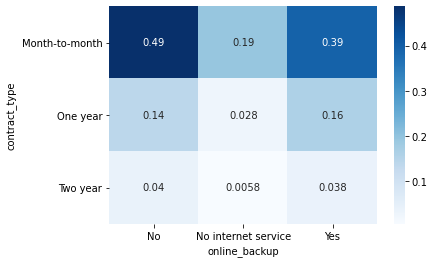

In [20]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'online_backup'), cmap='Blues', annot=True)

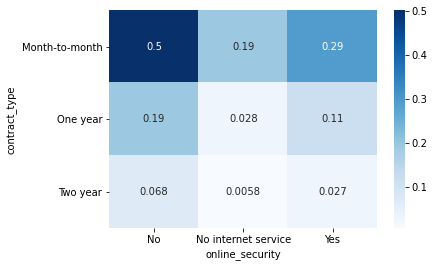

In [21]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'online_security'), cmap='Blues', annot=True)

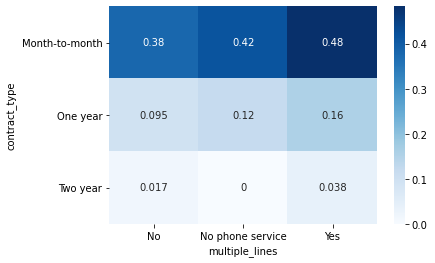

In [22]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'multiple_lines'), cmap='Blues', annot=True)

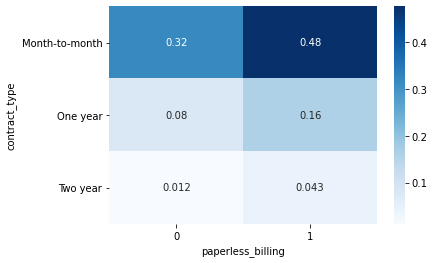

In [23]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'paperless_billing'), cmap='Blues', annot=True)

## Observations
 - In month to month contracts correlation between churn and multiple phone lines(0.48)
 - In month to month contracts correlation between churn and no online security (0.5)
 - In month to month contracts correlation between churn and no tech support (0.5)
 - In month to month contracts correlation between churn and electronic check payment type (0.53)
 - In month to month contracts correlation between churn and fiber optic internet service (0.54)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5670 to 6867
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   3943 non-null   object 
 1   senior_citizen           3943 non-null   int64  
 2   partner                  3943 non-null   int64  
 3   dependents               3943 non-null   int64  
 4   tenure                   3943 non-null   int64  
 5   phone_service            3943 non-null   int64  
 6   multiple_lines           3943 non-null   object 
 7   online_security          3943 non-null   object 
 8   online_backup            3943 non-null   object 
 9   device_protection        3943 non-null   object 
 10  tech_support             3943 non-null   object 
 11  streaming_tv             3943 non-null   object 
 12  streaming_movies         3943 non-null   object 
 13  paperless_billing        3943 non-null   int64  
 14  monthly_charges      

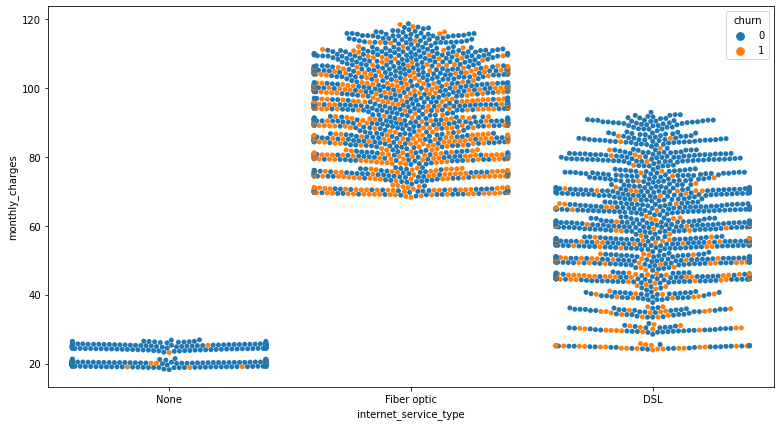

In [25]:

plt.figure(figsize=(13, 7))
sns.swarmplot(data=train, y='monthly_charges', x='internet_service_type', hue='churn')

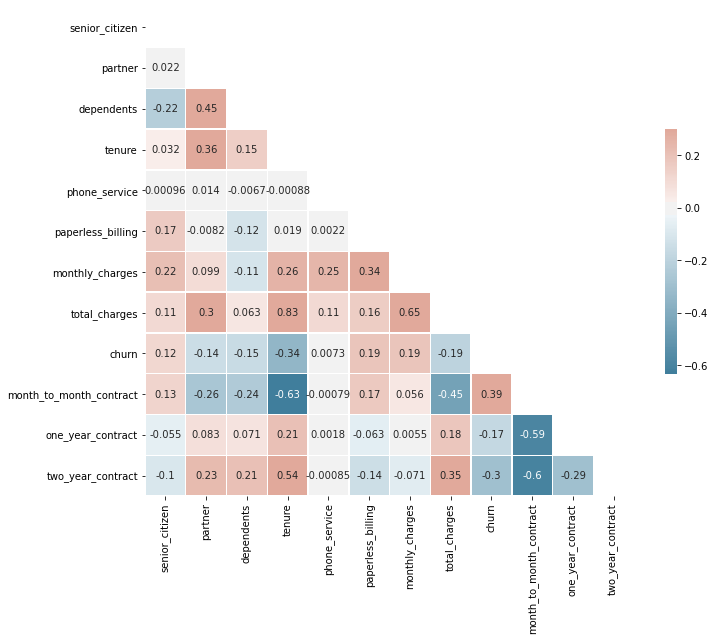

In [26]:
# Compute the correlation matrix (all train)
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

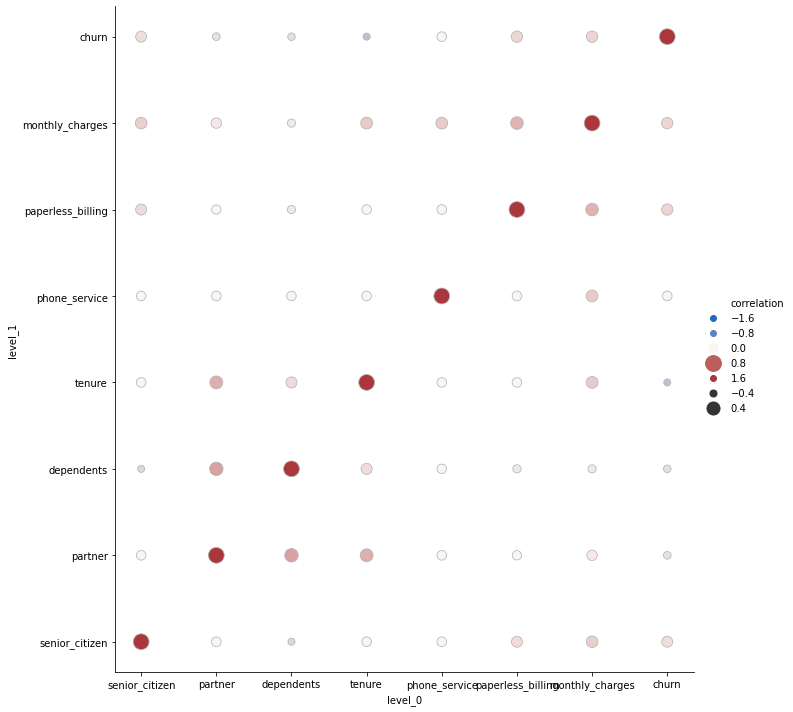

In [27]:
train = train[['churn', 'gender', 'senior_citizen', 'partner', 'dependents', 'month_to_month_contract', 'internet_service_type']]

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# # Tweak the figure to finalize
# g.set(xlabel="", ylabel="", aspect="equal")
# g.despine(left=True, bottom=True)
# g.ax.margins(.02)
# for label in g.ax.get_xticklabels():
#     label.set_rotation(90)
# for artist in g.legend.legendHandles:
#     artist.set_edgecolor(".7")


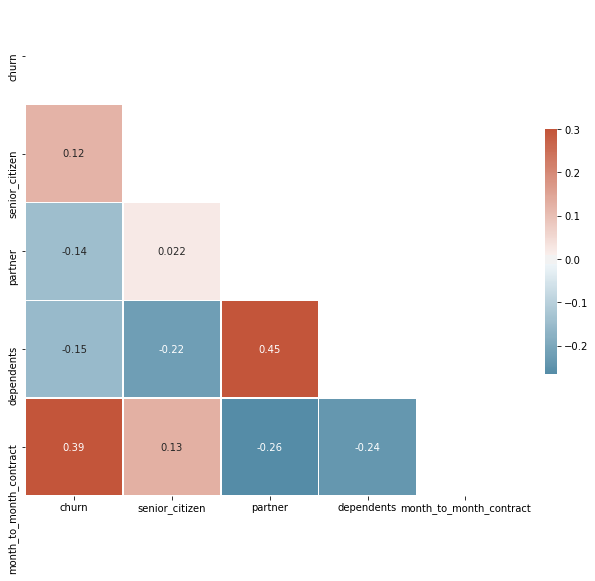

In [28]:
# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

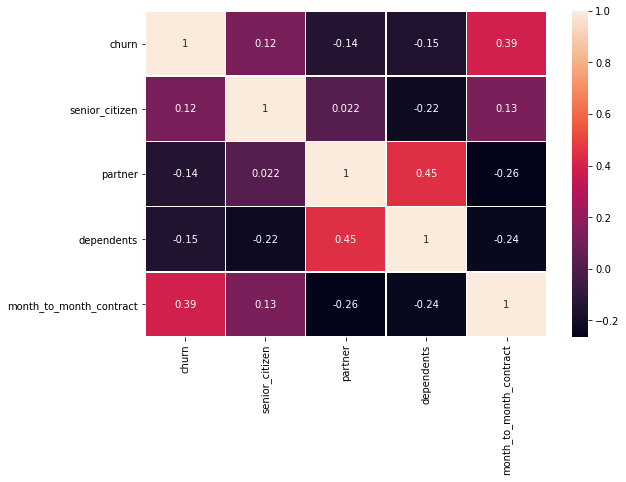

In [29]:
#2nd Heatmap, not sure which to use...
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)
plt.show()

In [30]:
train.churn.var(), train.month_to_month_contract.var()

(0.1949560794852888, 0.24762955834494135)


Null Hypothesis:

$H_0$: Churn and month to month contracts are independent (not dependent)

$H_a$: churn and month to month contracts are dependent


In [31]:
# Stats testing

observed = pd.crosstab(train.churn, train.month_to_month_contract)
observed

# Set our alpha
# alpha nice and low
alpha = .05

# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

null_hypothesis = "Churn and month to month contracts are independent"

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)


We reject the null hypothesis
We reject the hypothesis that Churn and month to month contracts are independent
4.445064986857053e-134


Null Hypothesis:

$H_0$: Churn and being a senior citizen are independent (not dependent)

$H_a$: Churn and being a senior citizen  are dependent


In [32]:
# Stats testing

observed = pd.crosstab(train.churn, train.senior_citizen)
observed

# Set our alpha
# alpha nice and low
alpha = .05

# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

null_hypothesis = "Churn and being a senior citizen are independent"

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

We reject the null hypothesis
We reject the hypothesis that Churn and being a senior citizen are independent
3.506345408511119e-14


In [33]:
# Cleaned Data for Exploration
df = acquire.get_telco_data(cached = True)
train, validate, test = prepare.prep_telco_data(df)
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,month_to_month_contract,one_year_contract,two_year_contract
5670,Male,0,0,1,5,1,No,No internet service,No internet service,No internet service,...,0,20.35,122.00,0,Month-to-month,None,Credit card (automatic),1,0,0
4152,Female,0,0,0,6,1,No,No,No,Yes,...,1,89.25,487.05,0,Month-to-month,Fiber optic,Electronic check,1,0,0
4890,Male,0,0,0,54,1,No,Yes,No,Yes,...,0,84.40,4484.05,0,One year,Fiber optic,Electronic check,0,1,0
2391,Female,0,1,0,72,1,Yes,Yes,Yes,No,...,0,64.75,4804.75,0,Two year,DSL,Bank transfer (automatic),0,0,1
2896,Male,0,1,0,28,1,No,No,No,No,...,0,76.55,2065.40,0,Month-to-month,Fiber optic,Bank transfer (automatic),1,0,0


In [34]:
# 2nd set to data to examine
train = train[['churn','paperless_billing','streaming_movies', 'streaming_tv', 'tech_support', 'device_protection', 'online_backup', 'online_security', 'multiple_lines', 'monthly_charges']]


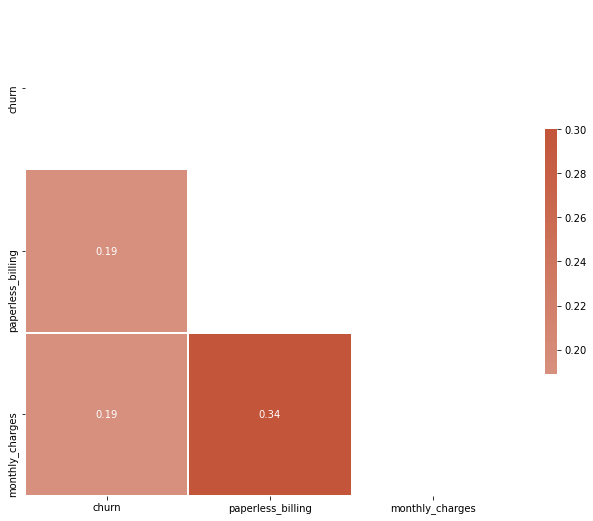

In [35]:
# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Null Hypothesis:

𝐻0

: Churn and paperless billing are independent (not dependent)

𝐻𝑎
: Churn and paperless billing are dependent

In [36]:
# Stats testing

observed = pd.crosstab(train.churn, train.paperless_billing)
observed

# Set our alpha
# alpha nice and low
alpha = .05

# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

null_hypothesis = "Churn and paperless billing are independent"

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

We reject the null hypothesis
We reject the hypothesis that Churn and paperless billing are independent
2.3727554678405111e-32


In [37]:

t, p = stats.ttest_ind(train.churn, train.monthly_charges, equal_var = True)
print(f'''
t = {t:.4f}
p = {p:.8f}
''')



t = -135.3714
p = 0.00000000



Null Hypothesis:

𝐻0

: Churn and streaming tv are independent (not dependent)

𝐻𝑎 : Churn and streaming tv  are dependent


In [38]:
# Stats testing

observed = pd.crosstab(train.churn, train.streaming_tv)
observed

# Set our alpha
# alpha nice and low
alpha = .05

# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

null_hypothesis = "Churn and streaming tv are independent"

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)


We reject the null hypothesis
We reject the hypothesis that Churn and streaming tv are independent
1.7165809270717408e-44


In [39]:
#titanic = acquire.get_titanic_data(cached=True)

In [40]:
#train, validate, test = prepare.prep_titanic(titanic)

In [41]:
#train.info()

In [42]:
#validate.info()

In [43]:
#test.info()

# Messing around with titanic data for exploratory data analysis

In [44]:
# df = acquire.get_titanic_data(cached=True)
# train, validate, test = prepare.prep_titanic(df)

# train = train[['survived', 'pclass', 'sex', 'age', 'fare', 'embark_town', 'alone']]

# train.head()

In [45]:
# survival_rate = train.survived.mean()

In [46]:
# train.survived.value_counts().plot.bar()
# plt.xlabel('Survived')

In [47]:
# train.groupby('sex').survived.mean().plot.bar(alpha=.8)
# plt.ylabel('Survival Rate')
# plt.hlines(survival_rate, *plt.xlim(), ls='--', alpha=.8)

In [48]:
# train.groupby('alone').survived.mean().plot.bar(alpha=.8)
# plt.ylabel('Survival Rate')
# plt.hlines(survival_rate, *plt.xlim(), ls='--', alpha=.8)

In [49]:
# # Exploring 2 categorical variables, but now we're treating survived as a category, not a number.
# pd.crosstab(train.survived, train.sex)

In [50]:
# pd.crosstab(train.survived, train.alone)

In [51]:
# train.groupby('survived').age.describe()

In [52]:
# train.groupby('survived').fare.describe()

In [53]:
# plt.figure(figsize=(13, 7))
# sns.swarmplot(data=train, y='sex', x='age', hue='survived')

# Messing around with the TELCO project dataset

In [54]:
# # We need to import data from SQL
# # Connect to employees database
# #defines function to create a sql url using personal credentials

# from env import host, user, password

# def get_db_url(database, user=user, host=host, password=password): 
#     url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
#     return url

# url = get_db_url('telco_churn')

# query = '''
# select * 
# from customers as c
# join contract_types as ct
# on ct.contract_type_id = c.contract_type_id
# join internet_service_types as i_s
# on i_s.internet_service_type_id = c.internet_service_type_id
# join payment_types as pt
# on pt.payment_type_id = c.payment_type_id;
# '''
# df = pd.read_sql(query, url)

In [55]:
# #Cleaned Data

# # Delete columns 'customer_id', contract_type_id, internet_service_type_id, payment_type_id    
# df.drop(columns = ['customer_id','contract_type_id','internet_service_type_id', 'payment_type_id'], inplace = True)
# # Replace partner, dependents, churn, phone_service, paperless billing, with boolean value
# df.partner.replace(['Yes', 'No'], [1,0], inplace = True)
# df.dependents.replace(['Yes', 'No'], [1,0], inplace = True)
# df.churn.replace(['Yes', 'No'], [1,0], inplace = True)
# df.phone_service.replace(['Yes', 'No'], [1,0], inplace = True)
# df.paperless_billing.replace(['Yes', 'No'], [1,0], inplace = True)
# # Add dummy variables as new columns in dataframe and rename them, delete origional
# gender = df.gender.str.get_dummies()
# df = pd.concat([df, gender], axis=1)
# df.rename(columns = {'Female': 'is_female', 'Male': 'is_male'}, inplace = True)
# df.drop(columns = ['gender'], inplace = True)
# # Add dummy variables as new columns in dataframe and rename them, delete origional
# multiple = df.multiple_lines.str.get_dummies()
# df = pd.concat([df, multiple], axis=1)
# df.rename(columns = {'No': 'no_multiple_lines', 'Yes': 'yes_multiple_lines'}, inplace = True)
# df.drop(columns = ['multiple_lines'], inplace = True)
# # Add dummy variables as new columns in dataframe and rename them, delete origional
# multiple = df.online_security.str.get_dummies()
# df = pd.concat([df, multiple], axis=1)
# df.rename(columns = {'No': 'no_online_security', 'Yes': 'yes_online_security'}, inplace = True)
# df.drop(columns = ['online_security'], inplace = True)
# # Add dummy variables as new columns in dataframe and rename them, delete origional
# multiple = df.online_backup.str.get_dummies()
# df = pd.concat([df, multiple], axis=1)
# df.rename(columns = {'No': 'no_online_backup', 'Yes': 'yes_online_backup'}, inplace = True)
# df.drop(columns = ['online_backup'], inplace = True)
# # Add dummy variables as new columns in dataframe and rename them, delete origional
# multiple = df.device_protection.str.get_dummies()
# df = pd.concat([df, multiple], axis=1)
# df.rename(columns = {'No': 'no_device_protection', 'Yes': 'yes_device_protection'}, inplace = True)
# df.drop(columns = ['device_protection'], inplace = True)
# # Add dummy variables as new columns in dataframe and rename them, delete origional
# multiple = df.tech_support.str.get_dummies()
# df = pd.concat([df, multiple], axis=1)
# df.rename(columns = {'No': 'no_tech_support', 'Yes': 'yes_tech_support'}, inplace = True)
# df.drop(columns = ['tech_support'], inplace = True)
# # Add dummy variables as new columns in dataframe and rename them, delete origional
# multiple = df.streaming_tv.str.get_dummies()
# df = pd.concat([df, multiple], axis=1)
# df.rename(columns = {'No': 'no_streaming_tv', 'Yes': 'yes_streaming_tv'}, inplace = True)
# df.drop(columns = ['streaming_tv', 'No internet service'], inplace = True)
# # Add dummy variables as new columns in dataframe and rename them, delete origional
# multiple = df.streaming_movies.str.get_dummies()
# df = pd.concat([df, multiple], axis=1)
# df.rename(columns = {'No': 'no_streaming_movies', 'Yes': 'yes_streaming_movies'}, inplace = True)
# df.drop(columns = ['streaming_movies'], inplace = True)
# # Add dummy variables as new columns in dataframe and rename them, delete origional
# multiple = df.contract_type.str.get_dummies()
# df = pd.concat([df, multiple], axis=1)
# df.rename(columns = {'Month-to-month': 'month_to_month_contract', 'One year': 'one_year_contract', 'Two year': 'two_year_contract'}, inplace = True)
# df.drop(columns = ['contract_type'], inplace = True)
# # Add dummy variables as new columns in dataframe and rename them, delete origional
# multiple = df.internet_service_type.str.get_dummies()
# df = pd.concat([df, multiple], axis=1)
# df.rename(columns = {'DSL': 'dsl', 'Fiber optic': 'fiber_optic'}, inplace = True)
# df.drop(columns = ['internet_service_type','None'], inplace = True)
# # Add dummy variables as new columns in dataframe and rename them, delete origional
# multiple = df.payment_type.str.get_dummies()
# df = pd.concat([df, multiple], axis=1)
# df.rename(columns = {'Bank transfer (automatic)': 'auto_bank_transfer', 'Credit card (automatic)': 'auto_credit_card', 'Electronic check': 'e_check', 'Mailed check': 'mail_check'}, inplace = True)
# df.drop(columns = ['payment_type'], inplace = True)
# # Change total_charges to float from object
# df['total_charges'] = pd.to_numeric(df['total_charges'],errors='coerce')

In [56]:
#df.info()

In [57]:
'''
Things to Consider:
1. How to handle colums that could be booleans (Yes/No/Null)
   -Keep as object or turn to int ?
   -Columns include '''
   
  

''' contract_type
    
2. Total charges change to float, it is currently an object
3. Delete origional dummy variable columns
'''

' contract_type\n    \n2. Total charges change to float, it is currently an object\n3. Delete origional dummy variable columns\n'

In [58]:
# dummy multiple lines

#df

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,Male,0,0,0,9,1,Yes,No,No,No,No,No,Yes,0,59.90,542.4,0,Month-to-month,DSL,Mailed check
1,Female,0,0,1,9,1,No,No,No,No,Yes,Yes,Yes,1,69.40,571.45,0,Month-to-month,DSL,Credit card (automatic)
2,Female,1,0,0,7,1,No,Yes,No,No,No,No,No,1,48.20,340.35,0,Month-to-month,DSL,Electronic check
3,Male,1,0,0,1,0,No phone service,No,No,No,No,No,No,1,25.10,25.1,1,Month-to-month,DSL,Electronic check
4,Female,0,1,1,1,0,No phone service,Yes,No,No,No,No,No,0,30.50,30.5,1,Month-to-month,DSL,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,28,1,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,20.30,487.95,0,Two year,None,Credit card (automatic)
7039,Male,0,0,0,63,1,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,0,25.25,1559.3,0,Two year,None,Mailed check
7040,Female,0,1,0,71,1,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,24.40,1725.4,0,Two year,None,Credit card (automatic)
7041,Female,0,1,1,67,1,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,19.25,1372.9,0,Two year,None,Bank transfer (automatic)
